In [2]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import numpy as np

In [3]:
path = r"C:\dev_tool\T_wpdt_winpython~V3.5.3.1\T_wpdt_winpython\notebooks\Data Analysis Proj\Data Analysis Tut\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data"
fol_contents = os.listdir(path)

all_month_data = pd.DataFrame()

for root, dirs, files in os.walk(path):
    for filename in files:
        if(filename.endswith(".csv") and "All_month_Data" not in filename):
            file_path = root+"\\"+filename
            df = pd.read_csv(file_path)
            all_month_data = pd.concat([all_month_data,df],ignore_index=True)

all_month_data.to_csv(r"C:\dev_tool\T_wpdt_winpython~V3.5.3.1\T_wpdt_winpython\notebooks\Data Analysis Proj\Data Analysis Tut\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\All_month_Data.csv",index=False)

In [4]:
all_data = pd.read_csv("All_month_Data.csv")

In [5]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Task 1:  Cleanup the Data

In [6]:
all_data.shape

(186850, 6)

In [7]:
all_data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [8]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
Order ID            186305 non-null object
Product             186305 non-null object
Quantity Ordered    186305 non-null object
Price Each          186305 non-null object
Order Date          186305 non-null object
Purchase Address    186305 non-null object
dtypes: object(6)
memory usage: 8.6+ MB


In [9]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

#### Drop Rows with NaN

In [10]:
#all_data.dropna(thresh=5,inplace=True)
#### Drop all the rows which all values are null
all_data.dropna(how='all',inplace=True)

In [11]:
all_data.shape

(186305, 6)

In [12]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### Remove unwanted rows from dataframe

In [13]:
all_data.index[all_data['Order Date']  == 'Order Date']

Int64Index([   519,   1149,   1155,   2878,   2893,   3036,   3209,   3618,
              4138,   4645,
            ...
            183808, 184489, 184666, 184779, 185118, 185164, 185551, 186563,
            186632, 186738],
           dtype='int64', length=355)

In [14]:
all_data.drop(all_data.index[all_data['Order Date']  == 'Order Date'],inplace=True)

In [15]:
all_data.shape

(185950, 6)

## Augmented data with additional column

### Task:2 Add Month Column

In [16]:
#all_data['month'] = all_data['Order Date'].str[0:1]
#all_data['month'] = all_data['month'].astype('int32')

In [17]:
all_data['month'] = all_data['Order Date'].str[0:2]

In [18]:
all_data['month'].unique()

array(['4/', '5/', '08', '09', '12', '01', '02', '03', '07', '06', '04',
       '05', '11', '10'], dtype=object)

In [19]:
def correct_month(val):
    if("/" in val):
        val = '0'+val[0]
        
    return val

all_data['month'] = all_data['month'].apply(correct_month)

In [20]:
all_data['month'].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

In [21]:
all_data['month'] = pd.to_numeric(all_data['month'])

### Task 3: Add a Sales Column

In [22]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4


In [23]:
#all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int32')
#all_data['Price Each'] = all_data['Price Each'].astype('float64')

### Another way to convert Data Type

all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])

In [24]:
all_data['total_sale'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [25]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total_sale
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Task 4 : Add a City column to table

In [26]:
def get_city(val):
    val_list = val.split(",")
    return (val_list[1])


def get_state(val):
    val_list = val.split(",")
    return (val_list[2].split(" ")[1])


all_data['city'] = all_data['Purchase Address'].apply(lambda x:get_city(x)+" "+"("+get_state(x)+")")

In [27]:
### Here you can see there are two Portland that's why we attach zip_code with city name
all_data['city'].unique()

array([' Dallas (TX)', ' Boston (MA)', ' Los Angeles (CA)',
       ' San Francisco (CA)', ' Seattle (WA)', ' Atlanta (GA)',
       ' New York City (NY)', ' Portland (OR)', ' Austin (TX)',
       ' Portland (ME)'], dtype=object)

In [28]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total_sale,city
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


## Q1: What was the best month for sale? How much was earned that month?

In [29]:
month_g = all_data.groupby('month')
df = month_g['total_sale'].sum()

In [30]:
df

month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: total_sale, dtype: float64

In [31]:
yr = df.index[df.max() == df]

In [32]:
yr

Int64Index([12], dtype='int64', name='month')

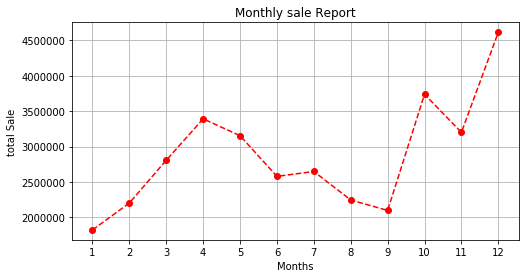

In [33]:
fig = plt.figure(figsize = (8,4))
plt.xlabel("Months")
plt.ylabel("total Sale")
plt.title("Monthly sale Report")
plt.grid()
plt.xticks(range(1,13))
#plt.annotate("ABC",xy=(1,3000000))
plt.plot(df,'ro--')

<Container object of 12 artists>

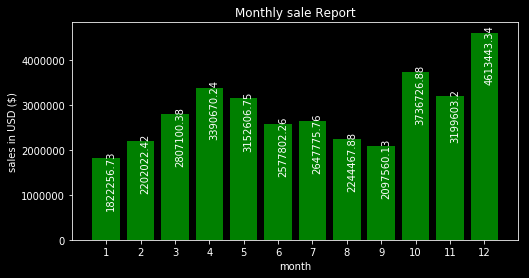

In [34]:
from matplotlib import style
style.use("dark_background")
month = range(1,13)
fig = plt.figure(figsize=(8,4))
ax = plt.axes()
plt.xticks(month)

plt.title("Monthly sale Report")
plt.xlabel("month")
plt.ylabel("sales in USD ($)")

for i in df.iteritems():
    #print(i)
    #plt.annotate(i[1],xy=i)
    ax.text(i[0],i[1],i[1],rotation=90)


plt.bar(month,df,color='g')


## Q2: which city sold the most product ?

In [35]:
all_data["city"].unique()

array([' Dallas (TX)', ' Boston (MA)', ' Los Angeles (CA)',
       ' San Francisco (CA)', ' Seattle (WA)', ' Atlanta (GA)',
       ' New York City (NY)', ' Portland (OR)', ' Austin (TX)',
       ' Portland (ME)'], dtype=object)

In [36]:
city_g = all_data.groupby("city")

In [37]:
all_data.groupby("city").sum()

,Quantity Ordered,Price Each,month,total_sale
city,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


In [38]:
df_city_sale_data = city_g['total_sale'].sum()
df_city_sale_data

city
 Atlanta (GA)          2.795499e+06
 Austin (TX)           1.819582e+06
 Boston (MA)           3.661642e+06
 Dallas (TX)           2.767975e+06
 Los Angeles (CA)      5.452571e+06
 New York City (NY)    4.664317e+06
 Portland (ME)         4.497583e+05
 Portland (OR)         1.870732e+06
 San Francisco (CA)    8.262204e+06
 Seattle (WA)          2.747755e+06
Name: total_sale, dtype: float64

In [39]:
df_city_sale_data.max()

8262203.9100040123

In [40]:
## This is also giving unique city names but it won't give us in Proper Order that we want
all_data['city'].unique()

array([' Dallas (TX)', ' Boston (MA)', ' Los Angeles (CA)',
       ' San Francisco (CA)', ' Seattle (WA)', ' Atlanta (GA)',
       ' New York City (NY)', ' Portland (OR)', ' Austin (TX)',
       ' Portland (ME)'], dtype=object)

In [41]:
city_name = [city for city,df in all_data.groupby("city") ]
city_name

[' Atlanta (GA)',
 ' Austin (TX)',
 ' Boston (MA)',
 ' Dallas (TX)',
 ' Los Angeles (CA)',
 ' New York City (NY)',
 ' Portland (ME)',
 ' Portland (OR)',
 ' San Francisco (CA)',
 ' Seattle (WA)']

<Container object of 10 artists>

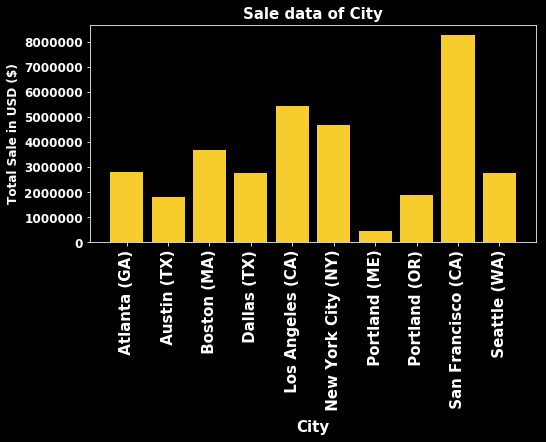

In [42]:
fig = plt.figure(figsize=(8,4))

city_name = [city for city,df in all_data.groupby("city") ]

city_range = range(1,len(city_name)+1)
plt.xticks(city_range,city_name,rotation=90,fontsize=15,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')
plt.xlabel("City",fontweight='bold',fontsize=15)
plt.ylabel("Total Sale in USD ($)",fontweight='bold',fontsize=12)
plt.title("Sale data of City",fontweight='bold',fontsize=15)

plt.bar(city_range,df_city_sale_data,color='#F7CD2E')

### Question #3: What time should we display advertisements to maximize the likelihood of purchases?

In [43]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [44]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

In [45]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total_sale,city,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [46]:
all_data['Hour'].unique()

array([ 8, 22, 14,  9, 13,  7, 10, 17, 12, 19, 15, 20, 18,  0, 11, 23, 21,
        4, 16,  5,  2,  1,  6,  3], dtype=int64)

In [47]:
hour_g = all_data.groupby("Hour")

In [48]:
hour_g_df = hour_g['Order ID'].count()
hour_g_df 

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Order ID, dtype: int64

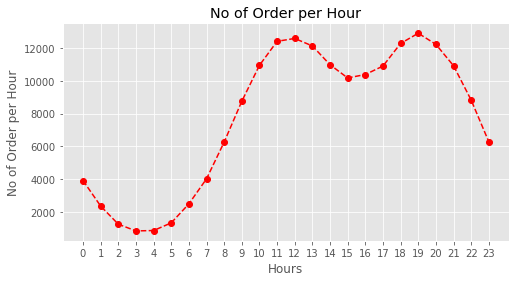

In [49]:
style.use("ggplot")
x_pos = [hr for hr,df in hour_g]
fig = plt.figure(figsize=(8,4))
plt.xlabel("Hours")
plt.ylabel("No of Order per Hour")
plt.title("No of Order per Hour",color='k')
plt.xticks(x_pos)
plt.plot(x_pos,hour_g_df,'ro--')

### My Recomandation is 11 AM (11) or 7 PM (19)

In [50]:
hour_g_df = hour_g['total_sale'].sum()
hour_g_df

Hour
0      713721.27
1      460866.88
2      234851.44
3      145757.89
4      162661.01
5      230679.82
6      448113.00
7      744854.12
8     1192348.97
9     1639030.58
10    1944286.77
11    2300610.24
12    2316821.34
13    2155389.80
14    2083672.73
15    1941549.60
16    1904601.31
17    2129361.61
18    2219348.30
19    2412938.54
20    2281716.24
21    2042000.86
22    1607549.21
23    1179304.44
Name: total_sale, dtype: float64

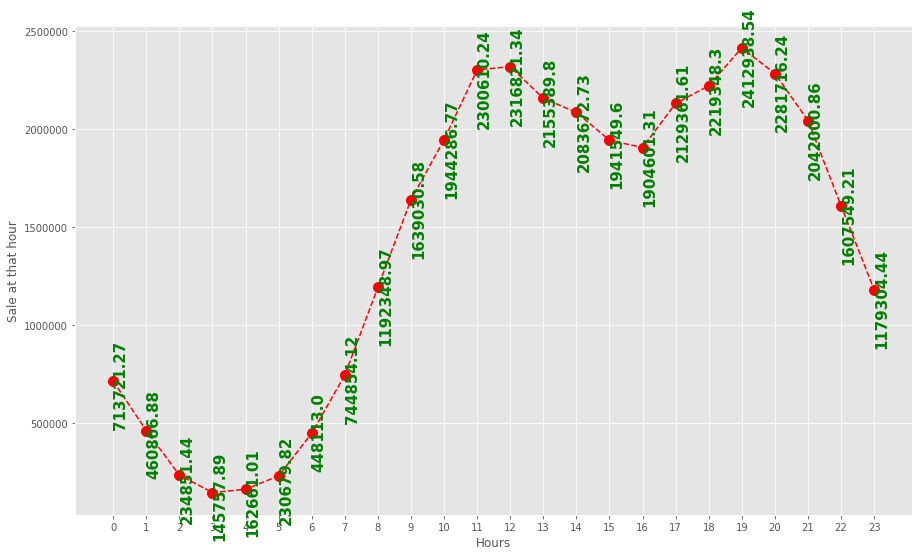

In [51]:
x_pos = [hr for hr,df in hour_g]
fig = plt.figure(figsize=(15,9))
plt.xlabel("Hours")
plt.ylabel("Sale at that hour")
plt.title("Sale as per Hour")
plt.xticks(x_pos)

ax = plt.axes()

for hour,sale in hour_g_df.iteritems():
    ax.text(x=hour,y=sale+150000,s=sale,rotation=90,color='g',fontsize=15,fontweight='bold')

plt.plot(x_pos,hour_g_df,color='r',marker='o',linestyle='--',markersize=10)

In [380]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total_sale,city,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27
6,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco (CA),13,3
7,176563,Bose SoundSport Headphones,1,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",4,99.99,Seattle (WA),7,46
8,176564,USB-C Charging Cable,1,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta (GA),10,58
9,176565,Macbook Pro Laptop,1,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",4,1700.00,San Francisco (CA),10,38
10,176566,Wired Headphones,1,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",4,11.99,Boston (MA),14,5


## Question #4: What products are most often sold together?

In [381]:
# dfObj[dfObj.duplicated(keep=False)]

In [382]:
## Remove that Order ID which are not duplicate 
df = all_data[all_data['Order ID'].duplicated(keep=False)]

In [383]:
df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total_sale,city,Hour,Minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco (CA),17,0
33,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco (CA),17,0
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City (NY),11,7
120,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.95,New York City (NY),11,7


In [384]:
df["Grouped_data"] = df.groupby("Order ID")['Product'].transform(lambda x:",".join(x))
df.head()

C:\dev_tool\T_wpdt_winpython~V3.5.3.1\T_wpdt_winpython\python-3.5.3.amd64\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total_sale,city,Hour,Minute,Grouped_data
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [385]:
df = df[['Order ID','Grouped_data']].drop_duplicates()
df.head()

,Order ID,Grouped_data
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [386]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped_data']:
    row_list = row.split(',')
    #print(row_list)
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Another way to solve same problem

"""
grp_by_oredr_id = df.groupby("Order ID")
d2 = dict()

for oid,df in grp_by_oredr_id:
    print(oid)
    print(df)
    break
"""

"""
d2 = dict()
for oid,df in grp_by_oredr_id['Grouped_data']:
    #print(oid)
    t1 = tuple(df.tolist())
    if(t1 in d2):
        d2[t1]+=1
    else:
        d2[t1] = 1

from collections import Counter
count = Counter()

count.update(d2)
for key,value in count.most_common(10):
    print(key, value)
    
"""

## Question #5: What product sold the most? Why do you think it did?

In [333]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total_sale,city,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [334]:
product_grp = all_data.groupby("Product")
product_ord_sum = product_grp['Quantity Ordered'].sum()

In [335]:
product_ord_sum

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

<Container object of 19 artists>

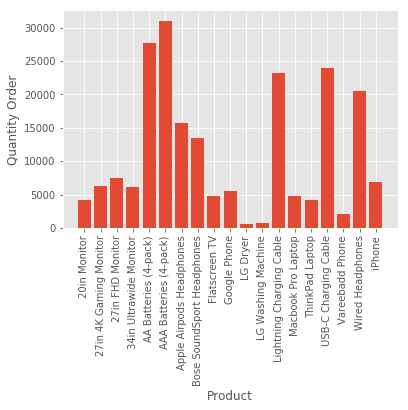

In [336]:
y = product_ord_sum.tolist()
x_pos = range(len(product_ord_sum))
plt.xticks(x_pos,list(product_ord_sum.index),rotation=90)
plt.xlabel("Product")
plt.ylabel("Quantity Order")
plt.bar(x_pos,y)


In [337]:
price_mean_data = all_data.groupby("Product")['Price Each'].mean()
price_mean_data

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

C:\dev_tool\T_wpdt_winpython~V3.5.3.1\T_wpdt_winpython\python-3.5.3.amd64\lib\site-packages\matplotlib\figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


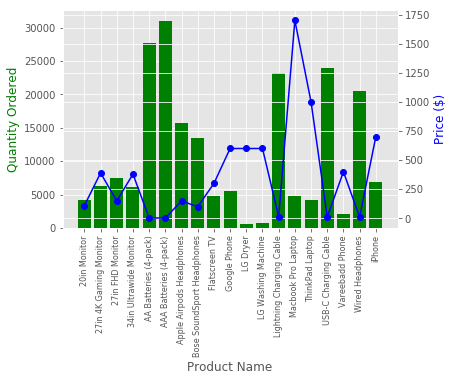

In [338]:
keys = list(product_ord_sum.index)

fig,ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x_pos, y, color='g')
ax2.plot(x_pos, price_mean_data, color='b',marker='o')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(x_pos, rotation='vertical', size=8)
plt.xticks(x_pos,keys)
fig.show()


In [339]:
len(keys)

19